Dataset Shape: (4945, 13)
           Product Type Release Date Process Size (nm) TDP (W)  \
0  AMD Athlon 1000  CPU       6/5/00               180      54   
1  AMD Athlon 1000  CPU     10/31/00               180      54   
2  AMD Athlon 1100  CPU      8/14/00               180      60   
3  AMD Athlon 1133  CPU     10/31/00               180      63   
4  AMD Athlon 1200  CPU     10/31/00               180      66   

  Die Size (mm^2) Transistors (million)  Freq (GHz) Foundry Vendor  \
0             120                    37      1000.0     NaN    AMD   
1             120                    37      1000.0     NaN    AMD   
2             120                    37      1100.0     NaN    AMD   
3             120                    37      1133.0     NaN    AMD   
4             120                    37      1200.0     NaN    AMD   

   FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN

C:\Users\JUNE\AppData\Local\Temp\ipykernel_32512\495951769.py:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")



Cleaned Dataset Shape: (3998, 14)
Product                          object
Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                         float64
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (GHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
Year                            float64
dtype: object


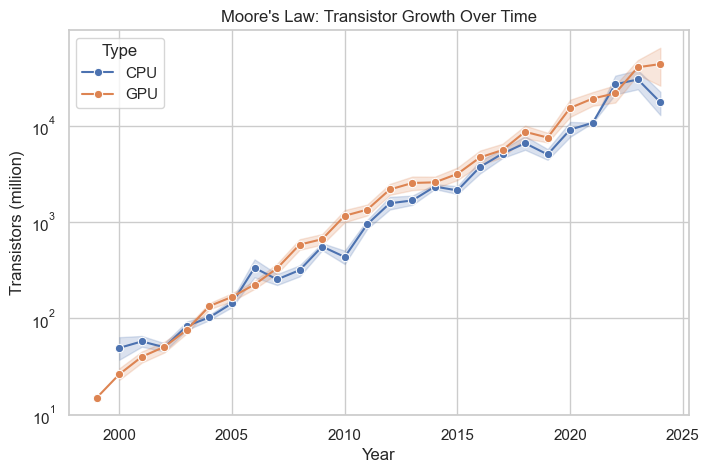

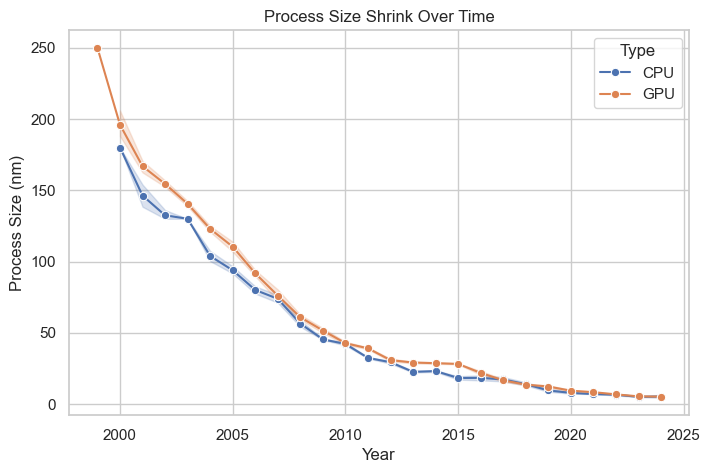

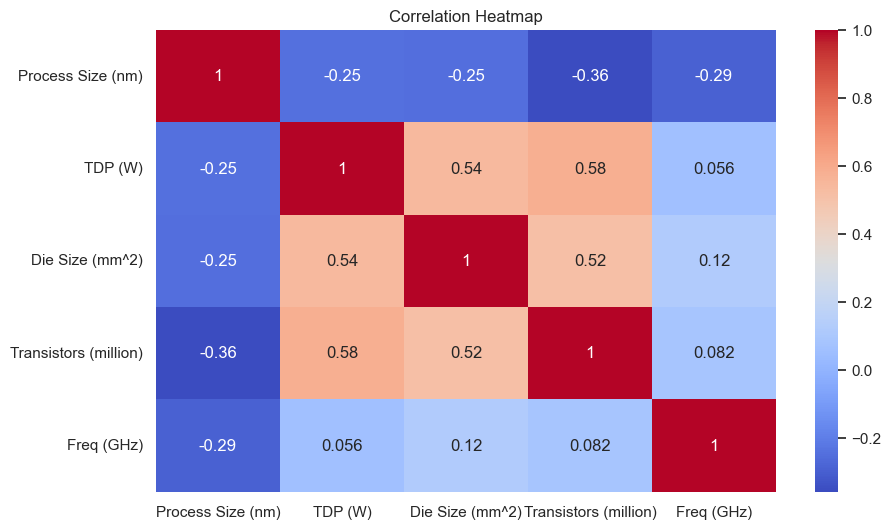


--- Regression Results ---
Linear Regression R2: 0.4043996684932534
Linear Regression MSE: 56357327.16082412
Random Forest R2: 0.9886793708764364
Random Forest MSE: 1071188.7912637966

--- Classification Results (Logistic Regression) ---
Accuracy: 0.9666136724960255
              precision    recall  f1-score   support

         CPU       0.97      0.97      0.97       328
         GPU       0.97      0.96      0.97       301

    accuracy                           0.97       629
   macro avg       0.97      0.97      0.97       629
weighted avg       0.97      0.97      0.97       629



In [ ]:
# Week 1 project
# Semiconductor Chip Dataset Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, r2_score, classification_report, accuracy_score
)

file_path = "chip_dataset.csv"   
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

df.columns = df.columns.str.strip()

for col in ["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)", "Freq (GHz)"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^\d.]+", "", regex=True)
        .replace("", np.nan)
        .astype(float)
    )

df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Year"] = df["Release Date"].dt.year

df = df.dropna(subset=["Year", "Transistors (million)", "Process Size (nm)"])

print("\nCleaned Dataset Shape:", df.shape)
print(df.dtypes)

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Year", y="Transistors (million)", hue="Type", marker="o")
plt.yscale("log")
plt.title("Moore's Law: Transistor Growth Over Time")
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Year", y="Process Size (nm)", hue="Type", marker="o")
plt.title("Process Size Shrink Over Time")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(
    df[["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Transistors (million)", "Freq (GHz)"]].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

features = ["Process Size (nm)", "TDP (W)", "Die Size (mm^2)", "Freq (GHz)"]
df_reg = df.dropna(subset=features + ["Transistors (million)"])

X_reg = df_reg[features]
y_reg = df_reg["Transistors (million)"]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("\n--- Regression Results ---")
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

df_clf = df.dropna(subset=features + ["Type"])

X = df_clf[features]
y = df_clf["Type"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n--- Classification Results (Logistic Regression) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=le.classes_))
